### Introduction to Neural Network Classification in Tensorflow

In [7]:
# DL needs
import tensorflow as tf
import tensorflow.keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

**Creating data to view and fit**

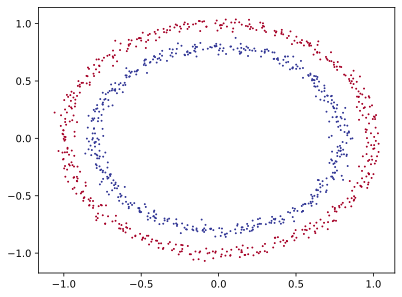

In [8]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples=1000

# create circles
X,y=make_circles(n_samples=n_samples,
                 noise=0.03,
                 random_state=random_seed
                 )

# visualizing the data
circles = pd.DataFrame({'X0': X[:,0],
                         'X1':X[:,1],
                         'label':y})
circles

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu,s=1)
plt.show()

**Creating train - test split**

In [9]:
# train-test-split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_seed)

# convert into tensors, and reshape correctly
X_train,X_test=tf.constant(X_train,dtype=tf.float32),tf.constant(X_test,dtype=tf.float32)

# creating training and testing datasets
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,y_test))

# creating train and test loader
batch_size=16
train_loader=train_dataset.shuffle(buffer_size=1000).batch(batch_size=batch_size).prefetch(tf.data.AUTOTUNE)
test_loader=test_dataset.shuffle(len(test_dataset)).prefetch(tf.data.AUTOTUNE)


In [42]:
# creating a model

class ClassNet(kr.Model):
    def __init__(self,lr=0.01,model_name="model_1",metrics=['accuracy']):
        super().__init__(name=model_name)
        # instantiating constructor of parent class

        # input layer:
        self.input_layer=tf.keras.Input(shape=[2,],name='input_layer')

        # hidden layer:
        self.fc1 = kr.layers.Dense(4,activation=None,name='hl1')
        self.fc2 = kr.layers.Dense(4,activation=None,name='hl2')

        # output layer
        self.output_layer=kr.layers.Dense(1,activation=None,name='output_layer')


        # other hyper-params
        # self.loss_function=kr.losses.BinaryCrossentropy
        self.loss_function="binary_crossentropy"
        self.optimizer=kr.optimizers.Adam(learning_rate=lr)
        self.eval_metrics=metrics

    def call(self,inputs):
        # forward propogation
        x=tf.nn.tanh(self.fc1(inputs))
        x=tf.nn.tanh(self.fc2(x))
        output=tf.nn.sigmoid(self.output_layer(x))
        return output

**3. Finding the best learning rate**

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use following steps:
* A learning rate **callback**.
* A modified loss curves plot (loss vs learning rate)

Select lr = [`ideal_lr/10,ideal_lr*10`]

In [43]:
model_1 = ClassNet(model_name='model_1')
model_1(tf.keras.Input(shape=[2,]))  
model_1.compile(loss=model_1.loss_function,optimizer=model_1.optimizer,metrics=model_1.eval_metrics)
model_1.summary()

# creating a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history_1 = model_1.fit(train_loader,
                        epochs=100,
                        callbacks=[lr_scheduler]
                        )


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4891 - loss: 0.7185 - learning_rate: 1.0000e-04
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4888 - loss: 0.7219 - learning_rate: 1.1220e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5209 - loss: 0.7027 - learning_rate: 1.2589e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4796 - loss: 0.7145 - learning_rate: 1.4125e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 0.7039 - learning_rate: 1.5849e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5067 - loss: 0.7071 - learning_rate: 1.7783e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4807 - loss: 0.7108 - learning_rate: 1.9953e-04
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4944 - loss: 0.7067 - learning_rate: 2.2387e-04
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 0.7010 - learning_

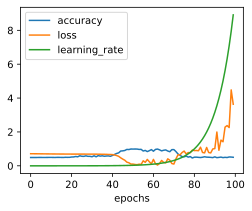

In [44]:
# check out the history
hist_1=pd.DataFrame(history_1.history).plot(figsize=(4,3),xlabel="epochs");

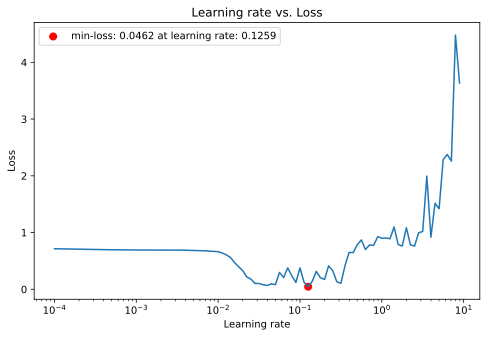

In [60]:
# plotting learning rate vs loss
epochs=100
lrs=1e-4*(10**(tf.range(epochs)/20))
plt.figure(figsize=(8,5))
plt.semilogx(lrs,history_1.history["loss"])
# min loss:
loc=tf.argmin(history_1.history["loss"]).numpy()
x=lrs[loc]
y=min(history_1.history["loss"])
plt.scatter(x,y,s=50,color=(1.0,0,0),label=f'min-loss: {np.round(y,4)} at learning rate: {np.round(x,4)}')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.legend()
plt.title("Learning rate vs. Loss")
plt.show()

In [76]:
# training a model with an ideal learning rate:
ideal_lr=lrs[loc].numpy()
model_2 = ClassNet(model_name='model_2',lr=0.1*ideal_lr)
model_2(tf.keras.Input(shape=[2,]))  
model_2.compile(loss=model_2.loss_function,optimizer=model_2.optimizer,metrics=model_2.eval_metrics)
model_2.summary()
history_2=model_2.fit(train_loader,epochs=25)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4834 - loss: 0.7070 
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5380 - loss: 0.6935
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5631 - loss: 0.6917
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5746 - loss: 0.6889
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5421 - loss: 0.6885
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5627 - loss: 0.6813
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6309 - loss: 0.6638
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7349 - loss: 0.6397
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.5976
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.5586
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8169 - loss: 0.5063
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8779 - l

In [77]:
# visualizing model's predictions, lets create a function 
def plot_decision_boundary(X,y,model):
    '''
    Input: Trained model, Features(X), and labels(y)
    # Creates a meshgrid of different X values
    # make predictions across the meshgrid
    # plot predictions as well as line between different zones where each unique class falls
    '''
    margin=0.1 # margin for meshgrid
    num_points=100 # points in meshgrid
    x_min,x_max=tf.reduce_min(X[:,0]) - margin, tf.reduce_max(X[:,0]) + margin
    y_min,y_max=tf.reduce_min(X[:,1]) - margin, tf.reduce_max(X[:,1]) + margin

    # creating meshgrid
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,num_points),
                        np.linspace(y_min,y_max,num_points))

    # creating X (input) value to make predictions
    x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together [(x1,y1),(x2,y2)....]
    
    # making predictions
    y_pred = model.predict(x_in)

    # check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multi-class classification")
        # we need to reshape our predictions to get them ready for plot
        y_pred=tf.argmax(y_pred,axis=1).numpy().reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred=tf.round(y_pred).numpy().reshape(xx.shape)

    # plotting the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=1,cmap=plt.cm.RdYlBu)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
Binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
Binary classification


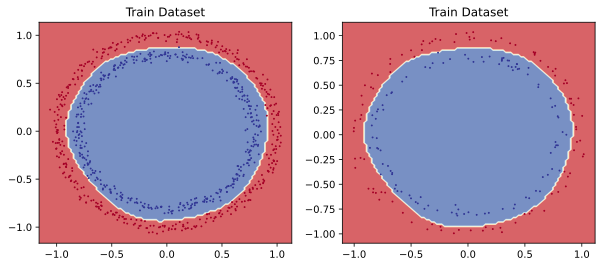

In [78]:
# plot the decision boundary for train and test datasets

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Train Dataset")
plot_decision_boundary(X_train,y_train,model_2)
plt.subplot(1,2,2)
plt.title("Train Dataset")
plot_decision_boundary(X_test,y_test,model_2)


In [79]:
model_2.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0915  


[0.09321942180395126, 1.0]